In [1]:
import time
import os
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import scipy
import pdb
import sys

/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [2]:
def imread(path, is_grayscale=True):
  """
  Read image using its path.
  Default value is gray-scale, and image is read by YCbCr format as the paper said.
  """
  if is_grayscale:
    return scipy.misc.imread(path, flatten=True, mode='YCbCr').astype(np.float)
  else:
    return scipy.misc.imread(path)#, mode='YCbCr')#.astype(np.float)


In [3]:
img = imread("CW1_Handout_Template_code/tf-SRCNN/image/butterfly_GT.bmp",is_grayscale=False)

/home/nv/virtpy3tf/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


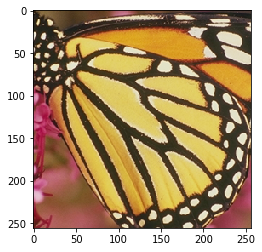

In [4]:
plt.imshow(img)
plt.show()

In [5]:
img.shape, img.dtype

((256, 256, 3), dtype('uint8'))

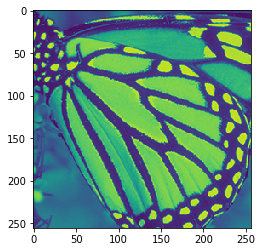

In [6]:
# Convert the image
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

# Show the image
plt.imshow(img_gray)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>


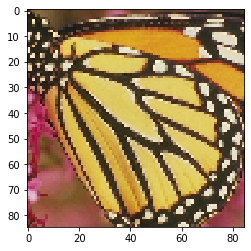

In [7]:
# To shrink the current image by 3 times with bicubic interpolation algorithm
img = tf.image.convert_image_dtype(img, tf.float32)
print(type(img))
# img_resize = tf.image.resize(img,[128,128], method=ResizeMethod.BICUBIC)
img_4d = tf.expand_dims(img,axis=0)
img_resize = tf.image.resize_bicubic(img_4d,[int(256/3),int(256/3)])
print(type(img_resize))
tf.InteractiveSession() 
a_np=img_resize.eval()
print(type(a_np))
a_np = np.squeeze(a_np, axis=0)
plt.imshow(a_np)
plt.show()

/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>


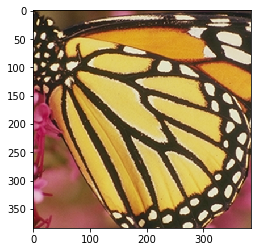

In [8]:
# To shrink the current image by 3 times with bicubic interpolation algorithm
img = tf.image.convert_image_dtype(img, tf.float32)
print(type(img))
# img_resize = tf.image.resize(img,[128,128], method=ResizeMethod.BICUBIC)
img_4d = tf.expand_dims(img,axis=0)
img_resize = tf.image.resize_bicubic(img_4d,[int(128*3),int(128*3)])
print(type(img_resize))
tf.InteractiveSession() 
a_np=img_resize.eval()
print(type(a_np))
a_np = np.squeeze(a_np, axis=0)
plt.imshow(a_np)
plt.show()

In [9]:
# To load the pre-trained model named model.npy
model_path='CW1_Handout_Template_code/tf-SRCNN/model/model.npy'
model = np.load(model_path, encoding='latin1', allow_pickle=True).item()

In [10]:
model['w1']

array([[[[-1.07725728e-02,  1.52068464e-02,  8.29045754e-03, ...,
          -1.13389257e-03,  9.18873993e-04,  5.70630538e-04]],

        [[-3.36508849e-03, -1.80331953e-02, -4.83402330e-03, ...,
           3.01992346e-04,  2.71355850e-03,  3.40837141e-04]],

        [[ 5.44544542e-03, -6.24164846e-03, -3.93065391e-03, ...,
           2.82270659e-04,  3.19202081e-03,  6.59449201e-04]],

        ...,

        [[ 3.43349529e-03, -1.03572570e-02, -3.51545541e-03, ...,
          -2.30326038e-03,  1.58106734e-03, -5.71571407e-04]],

        [[-5.91595005e-03, -3.50515097e-02, -1.41644906e-02, ...,
           1.14881038e-03, -1.04705582e-03,  2.44141091e-04]],

        [[-1.57014169e-02,  3.94084118e-02,  1.23664727e-02, ...,
           5.42975380e-04, -1.48777186e-03,  8.42187845e-04]]],


       [[[-1.28967585e-02, -1.39972055e-02, -3.40825599e-03, ...,
          -4.32494009e-04,  4.91739018e-04,  2.34909370e-04]],

        [[-1.25038847e-02, -1.25045469e-02, -3.07602482e-03, ...,
        

In [11]:
# To set and show the weights of the first convolutional layer
# • To set the filter number
# • To set the filter size
# • To show the value of the 1 st filter in command window
# • To show the bias of the 10 th filter in command window

print(model.keys())
print('Layer 1 Filter ',model['b1'])
print('Layer 1 Filter ',len(model['b1']))
print('1 st filter',model['b1'][0])
print('10 th bias ',model['w1'].shape)

dict_keys(['b2', 'w3', 'w2', 'w1', 'b3', 'b1'])
Layer 1 Filter  [-2.50727050e-02  3.69027816e-03  1.25206576e-03  2.27129017e-03
  2.16173488e-04  1.97886897e-04 -4.58078738e-03  2.03319010e-03
  5.30421094e-04 -1.16357725e-04  2.69323587e-03 -8.89129005e-03
 -4.04906087e-02  2.03068939e-05  1.09748635e-03  9.02105006e-04
  1.24817318e-03  1.30453110e-02  2.29762332e-03  4.31127008e-03
  3.43848602e-04  3.86284410e-06  7.12785579e-04  4.11023328e-04
 -2.14202479e-02 -1.86368206e-03  9.45012667e-04 -7.54757493e-05
 -1.86791699e-02 -6.78030410e-05 -3.20419371e-02  2.31817230e-05
 -1.19396973e-04  2.55033886e-03  3.32799827e-04  2.80117674e-04
  1.61494187e-03  3.05718160e-04 -1.13487639e-03 -3.54359602e-03
 -3.57500277e-02  6.59294985e-03  2.88222707e-03 -2.56297085e-03
  1.16023235e-03  2.83974060e-03  3.48212954e-04 -8.56808759e-03
 -7.60066687e-05  1.34819676e-03  2.73755586e-06 -9.27715373e-05
 -4.94600646e-02  3.18067003e-04 -3.55855263e-05  1.77997735e-03
 -1.10070091e-02 -2.279941

In [15]:
# To set and show the weights of the second convolutional layer
# • To set the filter number
# • To set the filter size
# • To show the value of the 5 th filter in command window
# • To show the bias of the 6 th filter in command window
# • To show the channel number of the input

print(model.keys())
print('Layer 2 Filter ',model['b2'])
print('Layer 2 Filter ',len(model['b2']))
print('5 th filter',model['b2'][4])
print('6 th bias',model['w2'].shape)
print('10 th bias ',model['w1'].shape[3])

dict_keys(['b2', 'w3', 'w2', 'w1', 'b3', 'b1'])
Layer 2 Filter  [-9.0193462e-05  1.0110046e-02  4.1804854e-03 -2.4073545e-03
 -2.5620409e-05 -3.2124456e-03 -6.3686870e-04  3.1088970e-03
 -4.9264299e-06 -5.7298756e-05  2.7873730e-02  4.4770859e-02
 -4.2688195e-03 -1.2635172e-03 -1.2292513e-03 -7.6820777e-04
 -2.9134869e-03 -5.9071236e-04 -2.7919246e-05 -1.4788102e-05
  2.8706519e-02 -4.5203064e-03 -1.1013546e-03  1.1331733e-01
 -1.0608691e-03 -1.9083034e-04 -2.1014011e-03 -1.1593724e-04
 -1.2458063e-02 -1.5053827e-03 -2.0035710e-05 -2.4643088e-02]
Layer 2 Filter  32
5 th filter -2.562041e-05
6 th bias (1, 1, 64, 32)
10 th bias  (9, 9, 1, 64)


In [43]:
# To set show the weights of the third convolutional layer
# • To set the filter number
# • To set the filter size
# • To show the value of the 1 st filter in command window
# • To show the bias of the 1 st filter in command window

print(model.keys())
print('Layer 3 Filter ',model['b3'])
print('Layer 3 Filter ',len(model['b2']))
print('5 th filter',model['b3'][0])
print('6 th bias',model['w3'].shape)

dict_keys(['b2', 'w3', 'w2', 'w1', 'b3', 'b1'])
Layer 3 Filter  [0.09075008]
Layer 3 Filter  32
5 th filter 0.090750076
6 th bias (5, 5, 32, 1)


In [ ]:
# To perform 2-d convolution filtering on a 2-d matrix with a given filter (Tip:
# conv2d and relu is a Tensorflow build-in function)

tf.nn.relu(tf.nn.conv2d(conv1, weights['w2'], strides=[1,1,1,1], padding='VALID')